In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import calendar
import datetime
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('ProjectTweets.csv', header = None, names = ['ids', 'date', 'flag', 'user', 'text'])  

df.head(10) # importing initial dataset with column headers

,ids,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
df.tail(10)

,ids,date,flag,user,text
1599990,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ids     1600000 non-null  int64 
 1   date    1600000 non-null  object
 2   flag    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
dtypes: int64(1), object(4)
memory usage: 73.2+ MB


In [5]:
df['flag'].values

array(['NO_QUERY', 'NO_QUERY', 'NO_QUERY', ..., 'NO_QUERY', 'NO_QUERY',
       'NO_QUERY'], dtype=object)

In [6]:
#df['date'] = pd.to_datetime(df['date'], format = '%d%b%Y:%H:%M:%S.%f')

df['date'].unique()

array(['Mon Apr 06 22:19:45 PDT 2009', 'Mon Apr 06 22:19:49 PDT 2009',
       'Mon Apr 06 22:19:53 PDT 2009', ...,
       'Tue Jun 16 08:38:58 PDT 2009', 'Tue Jun 16 08:39:00 PDT 2009',
       'Tue Jun 16 08:40:50 PDT 2009'], dtype=object)

In [7]:
df.head(5)

,ids,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
def remove_characters(string): 
    return string[:-8] + string[-5:]


df['date'] = df['date'].apply(remove_characters)

df.head(5)        # Removing the timezone as was preventing conversion to epoch time and not necessary for relative comparison

,ids,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
def datetime_to_epoch(dt):                   # Converting to epoch time and displaying
    return int(dt.timestamp())

df['date'] = pd.to_datetime(df['date'], format = '%a %b %d %H:%M:%S %Y')

df['date'] = df['date'].apply(datetime_to_epoch)

df.head(5) 
    

,ids,date,flag,user,text
0,1467810369,1239056385,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,1239056389,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,1239056393,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,1239056397,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,1239056397,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
is_sorted = df['date'].is_monotonic_increasing   # checking if sorted by time ascending

if is_sorted:
    print ('is sorted by time')
else:
    print('is not sorted by time')

is not sorted by time


In [11]:
df = df.sort_values(by = 'date')     # sorting by time

is_sorted = df['date'].is_monotonic_increasing

if is_sorted:
    print ('is sorted by time')
else:
    print('is not sorted by time') # checking again if sorted by time

is sorted by time


In [12]:
df.head(5)

,ids,date,flag,user,text
0,1467810369,1239056385,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,1239056389,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,1239056393,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,1239056397,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,1239056397,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
#import pytz

#def localize_datetime(dt):
#    return pytz.timezone('America/Los_Angeles').localize(dt)

In [14]:
#def my_tzinfos(tzname):
#    if tzname == 'PDT':
 #       return -7 * 3600
  #  else:
   #     return None

In [15]:
#def date_time_tzinfos(value):
#    return pd.to_datetime(value, tzinfos = my_tzinfos)

#df['epoch'] = df['date'].apply(date_time_tzinfos)

#df.head(5)

In [16]:
#def convert_to_epoch(value):
 #   try:
#        dt = pd.to_datetime(value)
 #       epoch_time = dt.timestamp()
 #       return epoch_time
 #   except ValueError:
     #   return None
    
    
#df['epoch time'] = df['date'].apply(convert_to_epoch)

#df.head(5)

In [17]:
#import datetime
#import pytz

#def convert_to_epoch(date_string):
#    date_obj = datetime.datetime.strptime(date_string[:-4], '%a %b %d %H:%M:%S')
#    timezone = pytz.timezone(date_string[-4:])
#    date_obj = timezone.localize(date_obj)
 #   return int(date_obj.timestamp())

#df['epoch time'] = df['date'].apply(convert_to_epoch)

#df.head(10)

In [18]:
df.info()  # Checking for nulls and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 799999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ids     1600000 non-null  int64 
 1   date    1600000 non-null  int64 
 2   flag    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
dtypes: int64(2), object(3)
memory usage: 73.2+ MB


In [19]:
df.isnull().sum()

ids     0
date    0
flag    0
user    0
text    0
dtype: int64

In [20]:
df.isna().sum()

ids     0
date    0
flag    0
user    0
text    0
dtype: int64

In [21]:
#df['date'] = pd.to_datetime(df['date'], format = '%a %b %d %H:%M:%S %z %Y')

#df = df.sort_values(by = 'date')

#df.head(10)

In [22]:
#import datetime     # removed timezone and year since same for all rows, sequence still there

#def remove_last_nine_characters(s):
#    return s[:-9]

#df['date'] = df['date'].apply(remove_last_nine_characters)

#df.head(5)

In [23]:
#df = df.sort_values(by = 'date') # ensuring dates in correct sequence

#df.head(10)

In [24]:
df = df.drop_duplicates(subset = ['user'])       # Drop any row containing duplicate user entries to maintain unique users

df.head(5)

,ids,date,flag,user,text
0,1467810369,1239056385,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,1239056389,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,1239056393,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,1239056397,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,1239056397,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [25]:
df.info() # confirming there were no duplicates by the count not changing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659775 entries, 0 to 799997
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ids     659775 non-null  int64 
 1   date    659775 non-null  int64 
 2   flag    659775 non-null  object
 3   user    659775 non-null  object
 4   text    659775 non-null  object
dtypes: int64(2), object(3)
memory usage: 30.2+ MB


In [26]:
df = df.drop(['ids', 'flag', 'user'], axis = 1) # removing unnecessary columns

df.head(5)

,date,text
0,1239056385,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1239056389,is upset that he can't update his Facebook by ...
2,1239056393,@Kenichan I dived many times for the ball. Man...
3,1239056397,my whole body feels itchy and like its on fire
4,1239056397,"@nationwideclass no, it's not behaving at all...."


In [27]:
user_mention_pattern = re.compile(r'@\w+')

def preprocessed_text(text):
    
    text = user_mention_pattern.sub('', text)   # Removing the user mentions
    
    text = re.sub(r'\b\w*http\w*\b', '', text)  # Removing words containing 'http' as they are just links etc.
    
    text = ''.join([char for char in text if char not in string.punctuation]) # removing special characters
    
    text = text.lower()                         # Making lowercase
    
    tokens = nltk.word_tokenize(text)           # Tokenizing the text
    
    stop_words = set(stopwords.words('english')) 
    
    tokens = [word for word in tokens if word not in stop_words] # Removing stopwords
    
    lemmatizer = WordNetLemmatizer()
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatizing the tokenized text
    
    text = ' '.join(tokens)                   # Join tokenized words back into a string
    
    return text

In [28]:
df['text'] = df['text'].apply(preprocessed_text)         # Applying the preprocessing function to the 'text' column

In [29]:
df.head(10)

,date,text
0,1239056385,twitpiccom2y1zl awww thats bummer shoulda got ...
1,1239056389,upset cant update facebook texting might cry r...
2,1239056393,dived many time ball managed save 50 rest go b...
3,1239056397,whole body feel itchy like fire
4,1239056397,behaving im mad cant see
5,1239056400,whole crew
6,1239056403,need hug
7,1239056403,hey long time see yes rain bit bit lol im fine...
8,1239056405,nope didnt
9,1239056409,que muera


In [30]:
is_sorted = df['date'].is_monotonic_increasing 

if is_sorted:
    print ('is sorted by time')
else:
    print('is not sorted by time')                  # checking again if still sorted by time

is sorted by time


In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()                 # Initialising instance of vader

def get_sentiment(text):
    sentiment_dict = sid.polarity_scores(text)
    return sentiment_dict['compound']

df['sentiment'] = df['text'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\paddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
df.head(5)  # Checking sentiment scores

,date,text,sentiment
0,1239056385,twitpiccom2y1zl awww thats bummer shoulda got ...,-0.3818
1,1239056389,upset cant update facebook texting might cry r...,-0.7269
2,1239056393,dived many time ball managed save 50 rest go b...,0.4939
3,1239056397,whole body feel itchy like fire,-0.2500
4,1239056397,behaving im mad cant see,-0.4939


In [33]:
df['date'] = pd.to_datetime(df['date'], unit = 's')   # Converting epoch time to datetime

weekly_average = df.resample('W', on = 'date')['sentiment'].mean() # getting mean sentiment per week


In [34]:
weekly_average.head(5)

date
2009-04-12    0.158228
2009-04-19    0.179045
2009-04-26    0.165070
2009-05-03    0.162670
2009-05-10    0.183491
Freq: W-SUN, Name: sentiment, dtype: float64

In [35]:
sentiment_min = df['sentiment'].min()   # checking min and max values
sentiment_max = df['sentiment'].max()

print(sentiment_min)
print(sentiment_max)

-0.9899
0.9928


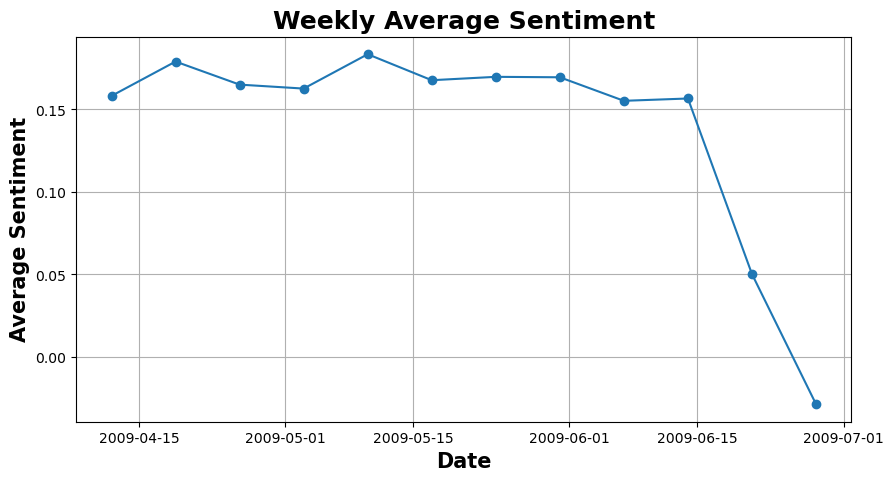

In [36]:
plt.figure(figsize = (10, 5))

plt.plot(weekly_average, marker = 'o', linestyle = '-')

plt.title('Weekly Average Sentiment', fontsize = 18, fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold', fontsize = 15)
plt.ylabel('Average Sentiment', fontweight = 'bold', fontsize = 15)

plt.grid(True)   #  Displaying results

plt.show() # Sentiment is positive (y > 0.05 threshold) until 2009-06-29 when it drops to neutral threshold (-0.05 <= y <= 0.05)

In [37]:
import time

start_time = time.time()

df.to_csv('sentiment_analysis.csv', index = False)            # Taking csv out to bring into ubuntu

end_time = time.time()

print(f'Time taken: {end_time - start_time} seconds')         # Timing the length of the operation

Time taken: 1.9930593967437744 seconds


In [38]:
df.head(10)

,date,text,sentiment
0,2009-04-06 22:19:45,twitpiccom2y1zl awww thats bummer shoulda got ...,-0.3818
1,2009-04-06 22:19:49,upset cant update facebook texting might cry r...,-0.7269
2,2009-04-06 22:19:53,dived many time ball managed save 50 rest go b...,0.4939
3,2009-04-06 22:19:57,whole body feel itchy like fire,-0.2500
4,2009-04-06 22:19:57,behaving im mad cant see,-0.4939
5,2009-04-06 22:20:00,whole crew,0.0000
6,2009-04-06 22:20:03,need hug,0.4767
7,2009-04-06 22:20:03,hey long time see yes rain bit bit lol im fine...,0.8481
8,2009-04-06 22:20:05,nope didnt,0.0000
9,2009-04-06 22:20:09,que muera,0.0000


In [39]:
minutely_average = df.resample('T', on = 'date')['sentiment'].mean()     # getting mean sentiment per min

minutely_average.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 114490 entries, 2009-04-06 22:19:00 to 2009-06-25 10:28:00
Freq: T
Series name: sentiment
Non-Null Count  Dtype  
--------------  -----  
28599 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [40]:
minutely_average = pd.DataFrame(minutely_average)

minutely_average.isnull().sum()

sentiment    85891
dtype: int64

In [41]:
minutely_average.describe

<bound method NDFrame.describe of                      sentiment
date                          
2009-04-06 22:19:00  -0.271740
2009-04-06 22:20:00   0.049792
2009-04-06 22:21:00  -0.121106
2009-04-06 22:22:00   0.213249
2009-04-06 22:23:00   0.182288
...                        ...
2009-06-25 10:24:00  -0.269436
2009-06-25 10:25:00  -0.134880
2009-06-25 10:26:00  -0.024705
2009-06-25 10:27:00  -0.557400
2009-06-25 10:28:00   0.048285

[114490 rows x 1 columns]>

In [42]:
start_date = df['date'].min()             # Creating a variable for the date range of the file
end_date = df['date'].max()

date_range = pd.date_range(start = start_date, end = end_date)

#df = df.reindex(date_range)  # reindexing date column

In [43]:
missing_dates = date_range.difference(df['date'])
missing_dates = pd.DataFrame(missing_dates, columns = ['date'])

print(missing_dates)                   # Showing the missing dates from the dataset

                  date
0  2009-04-07 22:19:45
1  2009-04-08 22:19:45
2  2009-04-09 22:19:45
3  2009-04-10 22:19:45
4  2009-04-11 22:19:45
..                 ...
69 2009-06-20 22:19:45
70 2009-06-21 22:19:45
71 2009-06-22 22:19:45
72 2009-06-23 22:19:45
73 2009-06-24 22:19:45

[74 rows x 1 columns]


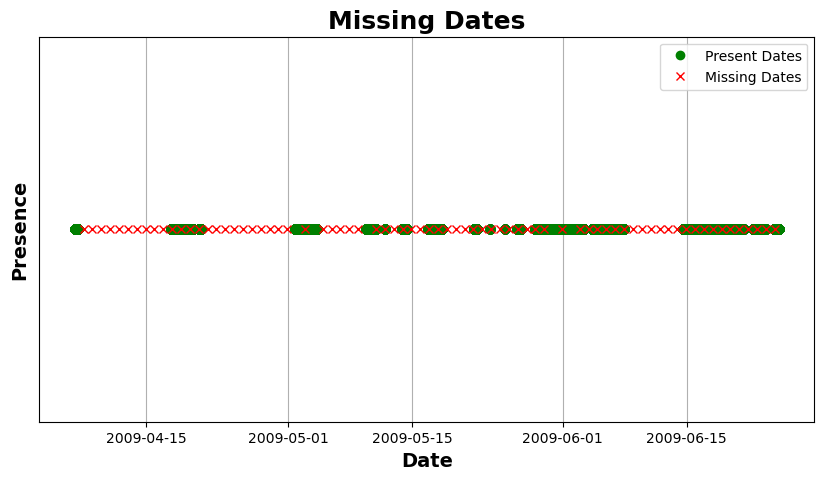

In [44]:
plt.figure(figsize = (10, 5))

plt.plot(df['date'], [1] * len(df['date']), 'go', label = 'Present Dates')

plt.plot(missing_dates, [1] * len(missing_dates), 'rx', label = 'Missing Dates')

plt.xlabel('Date', fontweight = 'bold', fontsize = 14)
plt.ylabel('Presence', fontweight = 'bold', fontsize = 14)
plt.title('Missing Dates', fontweight = 'bold', fontsize = 18)
plt.legend()
plt.yticks([])
plt.grid(True)

plt.show()            # Visualising the number of missing dates

In [45]:
#df.set_index('date', inplace = True)

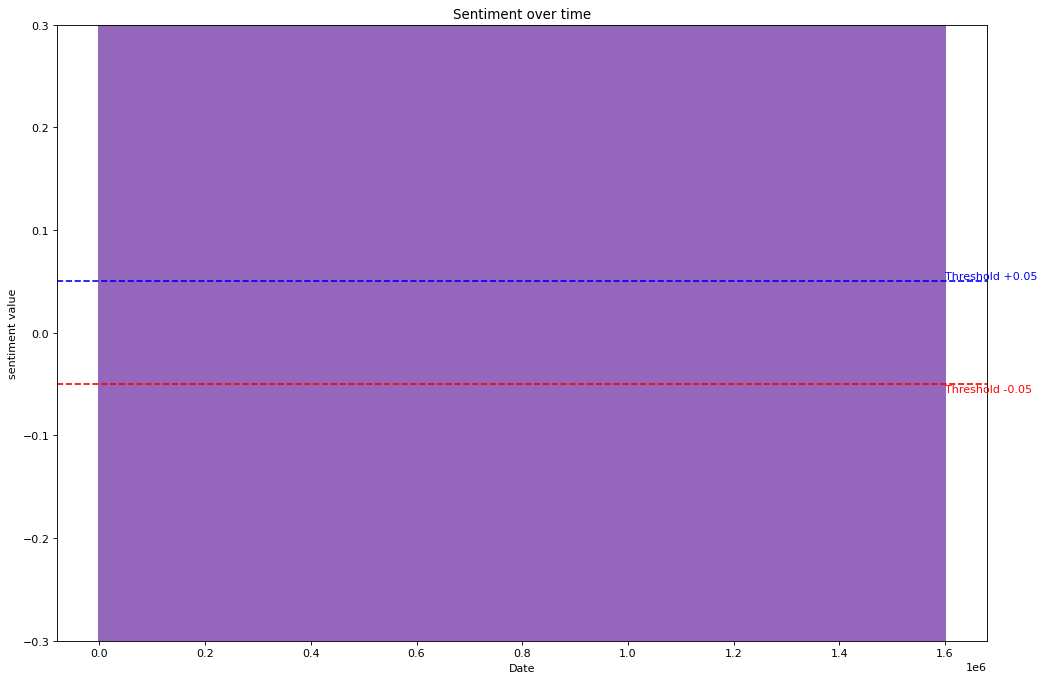

In [46]:
def plot_df(df, x, y, title = '', xlabel = 'Date', ylabel = 'sentiment value', dpi = 80):
    plt.figure(figsize=(15, 10), dpi = dpi)
    plt.plot(x, y, color = 'tab:purple')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)

    plt.axhline(y = 0.05, color = 'blue', linestyle = '--', label = 'Threshold +0.05')
    plt.axhline(y = -0.05, color = 'red', linestyle = '--', label = 'Threshold -0.05')
    plt.text(x.max(), 0.05, 'Threshold +0.05', va = 'bottom', ha = 'left', color = 'blue')
    plt.text(x.max(), -0.05, 'Threshold -0.05', va = 'top', ha = 'left', color = 'red')
    
    plt.ylim(-0.3, 0.3)
    plt.rcParams['agg.path.chunksize'] = 200
    plt.rcParams['path.simplify_threshold'] = 0.111111111111
    
 #   x_min, x_max = plt.xlim()
  #  new_x_min = x_min
  #  new_x_max = x_max * 2
    
  #  y_min, y_max = plt.ylim()
   # new_y_min = y_min
  #  new_y_max = y_max * 2
    
  #  plt.xlim(new_x_min, new_x_max)
  #  plt.ylim(new_y_min, new_y_max)
    
    plt.show()
    
plot_df(df, x = df.index, y = df['sentiment'], title = 'Sentiment over time')

In [47]:
df.head(80)

,date,text,sentiment
0,2009-04-06 22:19:45,twitpiccom2y1zl awww thats bummer shoulda got ...,-0.3818
1,2009-04-06 22:19:49,upset cant update facebook texting might cry r...,-0.7269
2,2009-04-06 22:19:53,dived many time ball managed save 50 rest go b...,0.4939
3,2009-04-06 22:19:57,whole body feel itchy like fire,-0.2500
4,2009-04-06 22:19:57,behaving im mad cant see,-0.4939
...,...,...,...
800014,2009-04-06 22:22:53,make sure dm post link video ltlolgtso dont mi...,0.5481
800015,2009-04-06 22:22:54,added tweetie new iphone,0.0000
61,2009-04-06 22:22:55,leaving parking lot work,0.0000
800017,2009-04-06 22:22:55,picture sweet,0.4588


In [48]:
#df = df.reindex(date_range)

#df['sentiment'] = df['sentiment'].bfill()

In [49]:
#missing_dates = date_range.difference(df['date'].index)         # Checking for empty dates
#missing_dates = pd.DataFrame(missing_dates, columns = ['date'])

#print(missing_dates)       # Showing the missing dates from the dataset

In [50]:
#df['sentiment'].isna().sum()      # Still some missing sentiments

In [51]:
#df['sentiment'] = df['sentiment'].bfill()

In [52]:
df['sentiment'].isna().sum()      # missing sentiments

0

In [53]:
df['sentiment'].isnull().sum() 

0

In [54]:
df['date'].isnull().sum()

0

In [55]:
df['date'].isna().sum()

0

In [56]:
#df['sentiment'] = df['sentiment'].ffill().bfill()

#df['sentiment'].isna().sum()

In [57]:
df.tail(80)

,date,text,sentiment
799798,2009-06-25 10:22:38,meee,0.0000
799802,2009-06-25 10:22:40,sad farrah fawcett passed away 2 februar 1947 ...,-0.4767
799803,2009-06-25 10:23:49,oh jill munroe,0.0000
799808,2009-06-25 10:23:50,wanting go glastonbury regress youth work spoilt,0.0000
799817,2009-06-25 10:23:59,fellow texan,0.0000
...,...,...,...
799987,2009-06-25 10:28:26,rip farrah god bless prayer love go family fri...,0.8481
799989,2009-06-25 10:28:26,payed way overdue zta due goodbye 350 thats go...,-0.4215
799993,2009-06-25 10:28:27,life mattfca20090624yayme,0.0000
799995,2009-06-25 10:28:28,sick spending day laying bed listening,-0.5106


In [58]:
df = df.ffill().bfill()            # Front fill and backfill

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659775 entries, 0 to 799997
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       659775 non-null  datetime64[ns]
 1   text       659775 non-null  object        
 2   sentiment  659775 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 36.3+ MB


In [59]:
if df.index.name == 'date':           # checking if date is the index, it isn't
    print('date is the index')
else:
    print('date is not the index')

date is not the index


In [60]:
df.set_index('date', inplace = True)        # setting date as index

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 659775 entries, 2009-04-06 22:19:45 to 2009-06-25 10:28:30
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       659775 non-null  object 
 1   sentiment  659775 non-null  float64
dtypes: float64(1), object(1)
memory usage: 15.1+ MB


In [61]:
df.head(10)

,text,sentiment
date,,
2009-04-06 22:19:45,twitpiccom2y1zl awww thats bummer shoulda got ...,-0.3818
2009-04-06 22:19:49,upset cant update facebook texting might cry r...,-0.7269
2009-04-06 22:19:53,dived many time ball managed save 50 rest go b...,0.4939
2009-04-06 22:19:57,whole body feel itchy like fire,-0.2500
2009-04-06 22:19:57,behaving im mad cant see,-0.4939
2009-04-06 22:20:00,whole crew,0.0000
2009-04-06 22:20:03,need hug,0.4767
2009-04-06 22:20:03,hey long time see yes rain bit bit lol im fine...,0.8481
2009-04-06 22:20:05,nope didnt,0.0000


In [62]:
hourly_avg = df.resample('H').mean()

df.head(10)

,text,sentiment
date,,
2009-04-06 22:19:45,twitpiccom2y1zl awww thats bummer shoulda got ...,-0.3818
2009-04-06 22:19:49,upset cant update facebook texting might cry r...,-0.7269
2009-04-06 22:19:53,dived many time ball managed save 50 rest go b...,0.4939
2009-04-06 22:19:57,whole body feel itchy like fire,-0.2500
2009-04-06 22:19:57,behaving im mad cant see,-0.4939
2009-04-06 22:20:00,whole crew,0.0000
2009-04-06 22:20:03,need hug,0.4767
2009-04-06 22:20:03,hey long time see yes rain bit bit lol im fine...,0.8481
2009-04-06 22:20:05,nope didnt,0.0000


In [63]:
hourly_avg.reset_index(inplace = True)       # Reset index to keep date as a column

In [64]:
hourly_avg.rename(columns = {'sentiment': 'hourly_avg_sentiment'}, inplace = True) # Rename sentiment column to hourly_avg_sentiment

In [65]:
df = hourly_avg     # Using only the hourly average values going forward

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1909 non-null   datetime64[ns]
 1   hourly_avg_sentiment  593 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.0 KB


In [66]:
df.isnull().sum()

date                       0
hourly_avg_sentiment    1316
dtype: int64

In [67]:
df.isna().sum()

date                       0
hourly_avg_sentiment    1316
dtype: int64

In [68]:
df = df.ffill().bfill()     # forward and back fill hourly values where missing

df.isna().sum()

date                    0
hourly_avg_sentiment    0
dtype: int64

In [69]:
df.isnull().sum()

date                    0
hourly_avg_sentiment    0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1909 non-null   datetime64[ns]
 1   hourly_avg_sentiment  1909 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.0 KB


In [71]:
df.head(5)

,date,hourly_avg_sentiment
0,2009-04-06 22:00:00,0.131349
1,2009-04-06 23:00:00,0.151259
2,2009-04-07 00:00:00,0.163168
3,2009-04-07 01:00:00,0.154655
4,2009-04-07 02:00:00,0.179830


In [72]:
#count = df.count()              # making train size to split into train and test data
#train_size = count * 0.8

#print(train_size)

In [73]:
split_index = int(len(df) * 0.8)          # Split into train and test

df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:split_index + 24 * 7]       # 7 days of values being predicted


df_test.shape       # sense checking correct shape

(168, 2)

In [74]:
df_train.shape      # sense checking correct shape

(1527, 2)

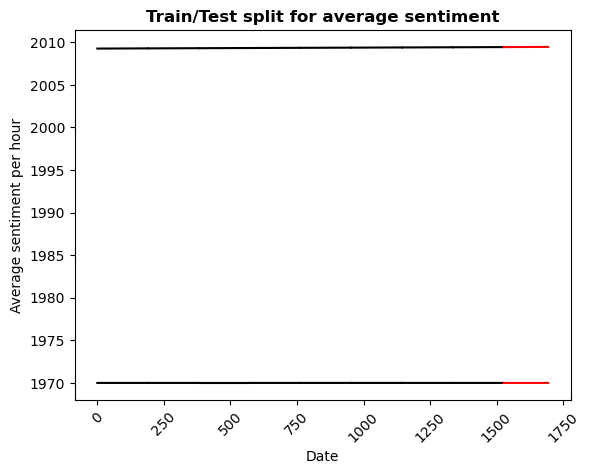

In [75]:
plt.plot(df_train, color = 'black')         # Displaying actual data
plt.plot(df_test, color = 'red')

plt.xlabel('Date')
plt.ylabel('Average sentiment per hour')

plt.xticks(rotation = 45)
plt.title("Train/Test split for average sentiment", fontweight = 'bold')

plt.show()

In [76]:
df.isna().sum()

date                    0
hourly_avg_sentiment    0
dtype: int64

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX   # Bringing in the SARIMAX class 
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

y = df_train['hourly_avg_sentiment']

ARMAmodel = ARIMA(y, order = (0, 1, 0))        # Had to adjust these parameters as getting warning around convergence
ARMAmodel = ARMAmodel.fit()

#SARIMAXmodel = SARIMAX(y, order = (1, 2, 2), seasonal_order = (2, 2, 2, 12))
#SARIMAXmodel = SARIMAXmodel.fit()

In [78]:
y_pred = ARMAmodel.get_forecast(len(df_test.index))

y_pred_df = y_pred.conf_int(alpha = 0.05)

y_pred_df.index = df_test.index[:24 * 7]

In [79]:
first_seven_days = y_pred_df.index[:24 * 7]


y_pred_df['Predictions'] = ARMAmodel.predict(start = first_seven_days[0], end = first_seven_days[-1]) # first 7 days prediction



In [80]:
y_pred_df.index = df_test.index

y_pred_out_ARMA = y_pred_df['Predictions']

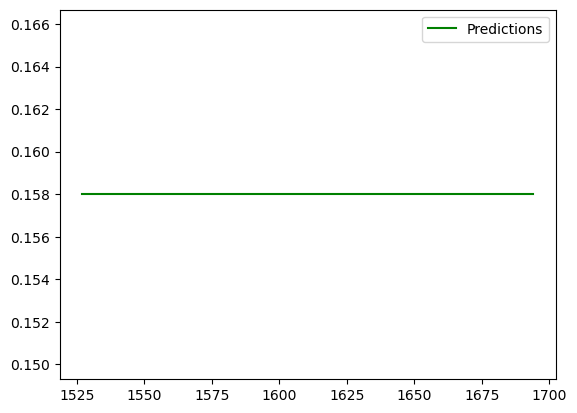

In [81]:
plt.plot(y_pred_out_ARMA, color = 'green', label = 'Predictions')

plt.legend()

In [82]:
arma_rmse = np.sqrt(mean_squared_error(df_test['hourly_avg_sentiment'].values, y_pred_df['Predictions']))

print('ARMA rmse:', arma_rmse)       # 

ARMA rmse: 0.030204001379829908


In [83]:
y_pred_df['Predictions']

1527    0.157986
1528    0.157986
1529    0.157986
1530    0.157986
1531    0.157986
          ...   
1690    0.157986
1691    0.157986
1692    0.157986
1693    0.157986
1694    0.157986
Name: Predictions, Length: 168, dtype: float64

In [84]:
df_test['hourly_avg_sentiment'].isna().sum()

0

In [85]:
y_pred_df['Predictions'].isna().sum()

0

In [86]:
from sklearn.model_selection import TimeSeriesSplit # Using timeseries cross validation to verify results

tscv = TimeSeriesSplit(n_splits = 5)

for train_index, test_index in tscv.split(df['hourly_avg_sentiment']):
    train, test = df['hourly_avg_sentiment'].iloc[train_index], df['hourly_avg_sentiment'].iloc[test_index]
    model = ARIMA(train, order = (1, 1, 1))
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print('RMSE: %.4f' % rmse) 
    
    # Inconsistent results across folds
    # Model performs well on some areas of the timeseries, but struggles with other parts of the data

C:\Users\paddy\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 0.0181
RMSE: 0.0312
RMSE: 0.0512
RMSE: 0.0248
RMSE: 0.1520


In [87]:
#SARIMAXmodel = SARIMAX(y, order = (1, 2, 2), seasonal_order = (2, 2, 2, 12))

In [88]:
#SARIMAXmodel = SARIMAXmodel.fit()

In [89]:
#plt.figure(figsize = (12, 6))

#plt.plot(df['date'], df['sentiment'], marker = 'o', linestyle = '-', label = 'Sentiment')


#for missing_date in missing_dates:
#    plt.axvline(x = missing_date, color = 'r', linestyle = '--', alpha = 0.5)
#
#plt.xlabel('Date', fontweight = 'bold', fontsize = 14)
#plt.ylabel('Sentiment', fontweight = 'bold', fontsize = 14)
#plt.title('Sentiment over time including missing dates', fontweight = 'bold', fontsize = 18)
#plt.legend()
#plt.yticks([])
#plt.grid(True)

#plt.show()            # Visualising the number of missing dates

In [90]:
#from scipy.interpolate import interp1d


In [91]:
#print(missing_dates)

In [92]:
df.head(5)

,date,hourly_avg_sentiment
0,2009-04-06 22:00:00,0.131349
1,2009-04-06 23:00:00,0.151259
2,2009-04-07 00:00:00,0.163168
3,2009-04-07 01:00:00,0.154655
4,2009-04-07 02:00:00,0.179830


In [93]:
data = df.filter(['hourly_avg_sentiment'])   # taking single column for array

In [94]:
import pprint

dataset = data.values      # Converting to numpy array for NN

pprint.pprint(dataset)  # check is array

array([[ 0.13134945],
       [ 0.15125878],
       [ 0.16316783],
       ...,
       [-0.01472786],
       [-0.03304987],
       [-0.08543832]])


In [95]:
import math

training_data_len = math.ceil(len(dataset) * .8)     # making array of length of training data this time

training_data_len   # length is as expected

1528

In [96]:
dataset

array([[ 0.13134945],
       [ 0.15125878],
       [ 0.16316783],
       ...,
       [-0.01472786],
       [-0.03304987],
       [-0.08543832]])

In [97]:
train_data = dataset[0 : training_data_len, :]     # creating training data variable

train_data.shape

(1528, 1)

In [98]:
x_train = []       # creating arrays to hold the training and test data
y_train = []


In [99]:
for i in range(40, len(train_data)):          # 40 lags as paramenter
    x_train.append(train_data[i-40:i, 0])
    y_train.append(train_data[i, 0])


In [100]:
x_train, y_train = np.array(x_train), np.array(y_train)  # Turning training data into numpy arrays for LSTM model

In [101]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))   # turning x_train into 3D for LSTM model

x_train.shape       # 1528 - 40 lags = 1488

(1488, 40, 1)

In [102]:
from keras.models import Sequential           # Bringing in keras to build our LSTM network
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')


In [103]:
model = Sequential()           # Building the NN with 3 hidden layers
model.add(LSTM(5, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(3, return_sequences = False))
model.add(Dense(2))
model.add(Dense(1))


In [104]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

                                            # Compiling the model, start optimizer and loss function for regression

In [105]:
model.fit(x_train, y_train, batch_size = 5, epochs = 5)


Epoch 1/5
298/298 [==============================] - 16s 45ms/step - loss: 7.5964e-04
Epoch 2/5
298/298 [==============================] - 14s 48ms/step - loss: 3.6901e-04
Epoch 3/5
298/298 [==============================] - 17s 57ms/step - loss: 3.6000e-04
Epoch 4/5
298/298 [==============================] - 16s 53ms/step - loss: 3.3520e-04
Epoch 5/5
298/298 [==============================] - 16s 52ms/step - loss: 3.4381e-04


In [106]:
test_data = dataset[training_data_len -40: , :]     # creating array of values for test set


In [107]:
x_test = []                                         # creating the test set
y_test = dataset[training_data_len:, :]

In [108]:
for i in range(40, len(test_data)):       # Loop to populate x_test and y_test using the number of lags specified
    x_test.append(test_data[i - 40:i, 0])


In [109]:
x_test = np.array(x_test)    # converting to numpy array 

In [110]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))     # Convert to 3D


In [111]:
predictions = model.predict(x_test)   # Making the prediction

12/12 [==============================] - 1s 15ms/step


In [112]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))       # Getting the root mean squared error and displaying

print('root mean squared error:', rmse)


root mean squared error: 0.05222505997951041


In [113]:
train = data[:training_data_len]         
valid = data[training_data_len:]
valid['Predictions'] = predictions        # Attaching actual values beside predicted values in a dataframe

C:\Users\paddy\AppData\Local\Temp\ipykernel_368\2125500193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions        # Attaching actual values beside predicted values in a dataframe


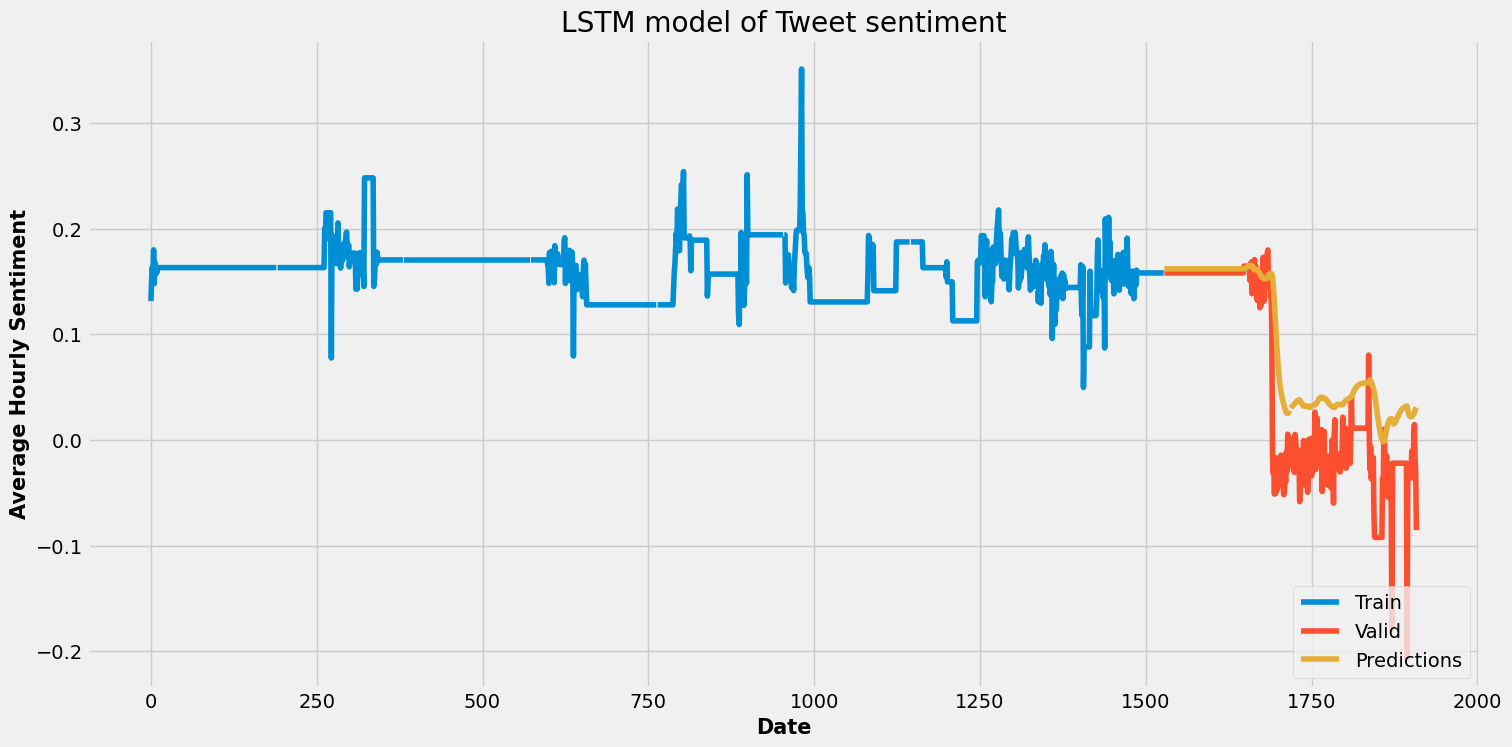

In [114]:
plt.figure(figsize = (16, 8))
plt.title('LSTM model of Tweet sentiment')
plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
plt.ylabel('Average Hourly Sentiment', fontsize = 15, fontweight = 'bold')

plt.plot(train['hourly_avg_sentiment'])
plt.plot(valid[['hourly_avg_sentiment', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')

plt.show()    # Visualising training, validation set and predictions

In [115]:
#for i in range(60, len(train_data)):          # 60 lags as paramenter
 #   x_train.append(train_data[i-60:i, 0])
#    y_train.append(train_data[i, 0])

In [116]:
#x_train, y_train = np.array(x_train), np.array(y_train)  # Turning training data into numpy arrays for LSTM model

In [117]:
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))   # turning x_train into 3D for LSTM model

#x_train.shape       # 1528 - 60 lags = 1468

In [118]:
model = Sequential()           # Building the NN with 4 hidden layers
model.add(LSTM(10, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(5, return_sequences = True))
model.add(LSTM(4, return_sequences = False))
model.add(Dense(2))
model.add(Dense(1))


In [119]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

# Compiling the model, start optimizer and loss function for regression

In [120]:
model.fit(x_train, y_train, batch_size = 10, epochs = 10)   # Increased number of batches and epochs

Epoch 1/10
149/149 [==============================] - 16s 79ms/step - loss: 0.0023
Epoch 2/10
149/149 [==============================] - 13s 84ms/step - loss: 6.3660e-04
Epoch 3/10
149/149 [==============================] - 13s 85ms/step - loss: 5.5499e-04
Epoch 4/10
149/149 [==============================] - 13s 86ms/step - loss: 4.6676e-04
Epoch 5/10
149/149 [==============================] - 12s 81ms/step - loss: 4.5600e-04
Epoch 6/10
149/149 [==============================] - 13s 85ms/step - loss: 4.2118e-04
Epoch 7/10
149/149 [==============================] - 13s 86ms/step - loss: 4.2354e-04
Epoch 8/10
149/149 [==============================] - 13s 86ms/step - loss: 3.9483e-04
Epoch 9/10
149/149 [==============================] - 13s 84ms/step - loss: 3.7158e-04
Epoch 10/10
149/149 [==============================] - 13s 85ms/step - loss: 3.6829e-04


In [121]:
test_data = dataset[training_data_len -40: , :]     # 40 lags

In [122]:
x_test = []                                         # creating the test set
y_test = dataset[training_data_len:, :]

In [123]:
for i in range(40, len(test_data)):       # Loop to populate x_test and y_test using the number of lags specified
    x_test.append(test_data[i - 40:i, 0])


In [124]:
x_test = np.array(x_test)    # converting to numpy array 

In [125]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))     # Convert to 3D

In [126]:
predictions = model.predict(x_test)   # Making the prediction

12/12 [==============================] - 1s 21ms/step


In [127]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))       # Getting the root mean squared error and displaying

print('root mean squared error:', rmse)        # Score not as good as original iteration


root mean squared error: 0.060548452706395924


In [128]:
train = data[:training_data_len]         
valid = data[training_data_len:]
valid['Predictions'] = predictions   

C:\Users\paddy\AppData\Local\Temp\ipykernel_368\2245529663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


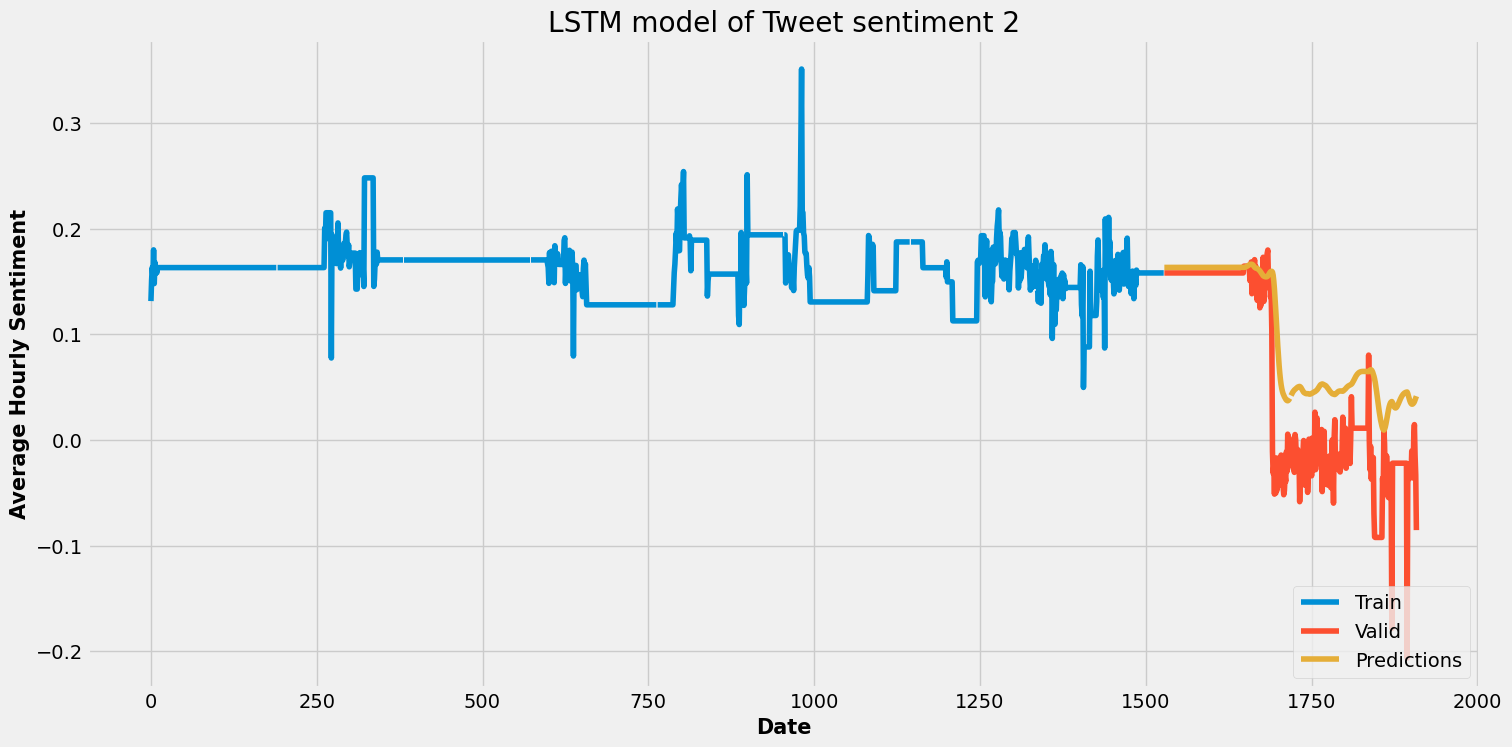

In [129]:
plt.figure(figsize = (16, 8))
plt.title('LSTM model of Tweet sentiment 2')
plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
plt.ylabel('Average Hourly Sentiment', fontsize = 15, fontweight = 'bold')

plt.plot(train['hourly_avg_sentiment'])
plt.plot(valid[['hourly_avg_sentiment', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')

plt.show()    # Visualising training, validation set and predictions for the second attempt of LSTM

# Unused code

In [130]:
##from nltk.sentiment import SentimentIntensityAnalyzer     # Bringing in the module for vader sentiment analysis

#nltk.download('vader_lexicon')

#sid = SentimentIntensityAnalyzer()         # Initialising vader sentiment analyzer

#def sentiment_label(text):
#    scores = sid.polarity_scores(text)
#    max_score = max(scores, key = scores.get)
    
#    if max_score == 'compound':                         # labelling the sentiment based off score from -1 to 1
#        if scores[max_score] >= 0.05:
#            return 'positive'
 #       elif scores[max_score] <= -0.05:
 #           return 'negative'
  #      else:
 #           return 'neutral'
        
 #   else:
  #      if max_score == 'pos':
  #          return 'positive'
  #      elif max_score == 'neg':
  #          return 'negative'
  #      else:
   #         return 'neutral'
        # return max_score
        
    

#df['sentiment'] = df['text'].apply(sentiment_label)

#df.head(5)

In [131]:
#df.info()

In [132]:
#df.tail(5)

In [133]:
#import seaborn as sns

#sentiment_counts = df['sentiment'].value_counts()           # Count of sentiment labels
#sorted_sentiments = sentiment_counts.index.tolist()         # Sorting sentiments by highest count

#sns.set_style('whitegrid')
#ax = sns.countplot(x = 'sentiment', data = df, order = sorted_sentiments, palette = 'summer')
#ax.set_xlabel('Sentiment', fontweight = 'bold')
#ax.set_ylabel('Count', fontweight = 'bold')

#plt.show()       # Display sentiment counts in order based off vader sentiment analysis

In [134]:
#print(sentiment_counts)

In [135]:
#df_neutral = df[df['sentiment'] == 'neutral'] [0:50000]    # Extracting each sentiment value for even spread
#df_positive = df[df['sentiment'] == 'positive'] [0:50000]
#df_negative = df[df['sentiment'] == 'negative'] [0:50000]


In [136]:
#df_positive.info()

In [137]:
#df_neutral.info()

In [138]:
#df_merged = pd.concat([df_neutral, df_positive, df_negative], axis = 0) # Bringing the 3 sentiment dataframes together


#pd.to_datetime(df['date'])

#df_merged = df_merged.sort_values(by = 'date')           # sorting by earliest to latest tweet

#df_merged = df_merged.reset_index(drop = True)

#df_merged.head(5)

In [139]:
#is_sorted = df['date'].is_monotonic_increasing 

#if is_sorted:
#    print ('is sorted by time')
#else:
#    print('is not sorted by time') # checking again if sorted by time

In [140]:
#df_merged.tail(5)

In [141]:
#df_merged.info()            # checking number of rows

In [142]:
#df_merged.head(5)

In [143]:
#df = df_merged

#df.head(5)

In [144]:
#numerical = pd.get_dummies(df['sentiment'])       # Making numerical data out of the categorical data

#df.drop(['sentiment'], axis = 1, inplace = True)

#df = pd.concat([df, numerical], axis = 1)        # Combine the numerical data with the df dataframe

#df.head(10)